In [ ]:
# Assignment No.2
# Aim: Implement Feed forward neural networks with Keras and TensorFlow


In [4]:
# import the necessary packages and libraries

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse
import sys

In [5]:
# construct the argument parse and parse the arguments
sys.argv = ["colab", "--output", "output.png"]

ap = argparse.ArgumentParser()
ap.add_argument("-o", "--output", required=True,
help="path to the output loss/accuracy plot")
args = vars(ap.parse_args())

print(args)   # {'output': 'output.png'}

{'output': 'output.png'}


In [8]:
# grab the MNIST dataset

from keras.datasets import mnist
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()

[INFO] accessing MNIST...


In [11]:
# each image in the MNIST dataset is represented as a 28x28x1 image,
# but in order to apply a standard neural network we must
# first "flatten" the image to be simple list of 28x28=784 pixels

trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

In [13]:
# scale data to the range of [0, 1]

trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0
print(trainX)
print(trainY)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[5 0 4 ... 5 6 8]


In [28]:
# convert the labels from integers to vectors

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [29]:
from tensorflow.keras.layers import Input
# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Input(shape=(784,))) # Use Input layer as the first layer
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [30]:
# train the model using Adam
print("[INFO] training network...")
# sgd = SGD(0.01)
# model.compile(loss="categorical_crossentropy", optimizer=sgd,
# metrics=["accuracy"])
model.compile(loss="categorical_crossentropy", optimizer="adam",
metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
epochs=100, batch_size=128)

[INFO] training network...
Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5320 - loss: 1.5972 - val_accuracy: 0.8490 - val_loss: 0.5215
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8632 - loss: 0.4749 - val_accuracy: 0.8919 - val_loss: 0.3713
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8966 - loss: 0.3566 - val_accuracy: 0.9059 - val_loss: 0.3217
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9087 - loss: 0.3211 - val_accuracy: 0.9153 - val_loss: 0.2920
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9138 - loss: 0.2957 - val_accuracy: 0.9215 - val_loss: 0.2695
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9230 - loss: 0.2765 - val_accuracy: 0.9266 - val_loss: 0.2517
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9258 - loss: 0.2535 - val_accuracy: 0.9314 - val_loss: 0.2382
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.933

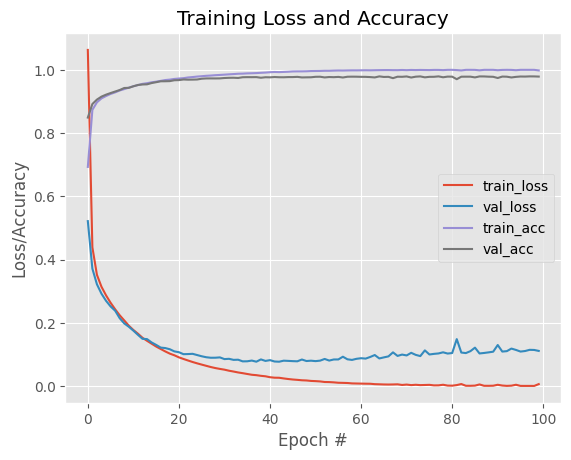

In [31]:
# plot the training loss and accuracy


plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")

plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig(args["output"])